In [1]:
# Necessary imports
## Data loading, processing and for more
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Visualization
import seaborn as sns
sns.set()
from datetime import datetime as dt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
dtype_options = {1: str, 8: str, 9: str, 10: str, 11: str,12: str,13: str,14: str,15: str,16: str,17: str,18: str,19: str,20: str,21: str,22: str,23: str,24: str,25: str,26: str,27: str,28: str,29: str,30: str,31: str,32: str,33: str, 34: str}  # Specify appropriate data types for each column
bank_fraud_data = pd.read_csv("Dataset/bank_fraud_dataset.csv")

In [3]:
cols =["sl.no","label","msisdn","aon","daily_decr30","daily_decr90","rental30","rental90","last_rech_date_ma","last_rech_date_da","last_rech_amt_ma","cnt_ma_rech30","fr_ma_rech30","sumamnt_ma_rech30","medianamnt_ma_rech30","medianmarechprebal30","cnt_ma_rech90","fr_ma_rech90","sumamnt_ma_rech90","medianamnt_ma_rech90","medianmarechprebal90","cnt_da_rech30","fr_da_rech30","cnt_da_rech90","fr_da_rech90","cnt_loans30","amnt_loans30","maxamnt_loans30","medianamnt_loans30","cnt_loans90","amnt_loans90","maxamnt_loans90","medianamnt_loans90","payback30","payback90","pcircle","pdate"]

In [4]:
bank_fraud_data

,sl.no,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,5340,1,95837I85330,315.0,9910.165000,9955.990000,682.50,1096.75,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,25-07-2016
5339,5341,1,01078I82732,1885.0,41.440000,41.440000,2042.60,2042.60,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,7.333333,7.333333,UPW,28-06-2016
5340,5342,1,46317I89238,1924.0,1543.626667,1548.100000,916.26,960.26,1.0,0.0,...,6.0,1.0,2.0,12,6,0.5,0.000000,4.500000,UPW,22-07-2016
5341,5343,1,64850I95204,145.0,40.200000,40.200000,162.00,162.00,7.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,18-06-2016


In [5]:
# Information about dataframes of bank_fraud_data
bank_fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5343 entries, 0 to 5342
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sl.no                 5343 non-null   int64  
 1   label                 5343 non-null   int64  
 2   msisdn                5343 non-null   object 
 3   aon                   5343 non-null   float64
 4   daily_decr30          5343 non-null   float64
 5   daily_decr90          5343 non-null   float64
 6   rental30              5343 non-null   float64
 7   rental90              5343 non-null   float64
 8   last_rech_date_ma     5343 non-null   float64
 9   last_rech_date_da     5343 non-null   float64
 10  last_rech_amt_ma      5343 non-null   int64  
 11  cnt_ma_rech30         5343 non-null   int64  
 12  fr_ma_rech30          5343 non-null   float64
 13  sumamnt_ma_rech30     5343 non-null   int64  
 14  medianamnt_ma_rech30  5343 non-null   float64
 15  medianmarechprebal30 

In [6]:
bank_fraud_data.isnull().sum()

sl.no                   0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# Handling missing value
# Remove rows with missing values
bank_fraud_data.dropna(axis = 0, inplace=True) 

In [8]:
# Removing duplicates
bank_fraud_data.drop_duplicates(inplace=True)

In [9]:
bank_fraud_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sl.no,5343.0,2672.000936,1542.537195,1.000,1336.500000,2672.000000,4007.500000,5344.000000
label,5343.0,0.880404,0.324519,0.000,1.000000,1.000000,1.000000,1.000000
aon,5343.0,9154.684647,80143.584587,-48.000,247.000000,526.000000,975.500000,973610.205600
daily_decr30,5343.0,5354.529267,8907.021650,-11.592,40.784000,1413.038667,7202.523000,97829.000000
daily_decr90,5343.0,6041.069855,10535.684759,-11.592,41.171667,1443.180000,7729.430000,150278.820000
rental30,5343.0,2615.439880,4049.861634,-3774.760,285.640000,1069.640000,3273.845000,57343.390000
rental90,5343.0,3370.425426,5399.456096,-3774.760,300.000000,1304.350000,4094.790000,76981.300000
last_rech_date_ma,5343.0,3864.765657,55077.650411,-29.000,1.000000,3.000000,7.000000,995749.962400
last_rech_date_da,5343.0,3522.143519,53497.457009,0.000,0.000000,0.000000,0.000000,995848.999700
last_rech_amt_ma,5343.0,2066.533783,2300.333557,0.000,770.000000,1539.000000,2309.000000,32000.000000


In [10]:
bank_fraud_data = pd.DataFrame(bank_fraud_data)

label_encoder = LabelEncoder()
bank_fraud_data['pcircle'] = label_encoder.fit_transform(bank_fraud_data['pcircle'])

In [11]:
bank_fraud_data

,sl.no,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,5340,1,95837I85330,315.0,9910.165000,9955.990000,682.50,1096.75,4.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,25-07-2016
5339,5341,1,01078I82732,1885.0,41.440000,41.440000,2042.60,2042.60,1.0,0.0,...,6.0,0.0,4.0,24,6,0.0,7.333333,7.333333,0,28-06-2016
5340,5342,1,46317I89238,1924.0,1543.626667,1548.100000,916.26,960.26,1.0,0.0,...,6.0,1.0,2.0,12,6,0.5,0.000000,4.500000,0,22-07-2016
5341,5343,1,64850I95204,145.0,40.200000,40.200000,162.00,162.00,7.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,18-06-2016


In [12]:
columns_to_drop =["sl.no","last_rech_date_ma","last_rech_date_da","last_rech_amt_ma","cnt_ma_rech30","fr_ma_rech30","sumamnt_ma_rech30","medianamnt_ma_rech30","medianmarechprebal30","cnt_ma_rech90","fr_ma_rech90","sumamnt_ma_rech90","medianamnt_ma_rech90","medianmarechprebal90","cnt_da_rech30","fr_da_rech30","cnt_da_rech90","fr_da_rech90","medianamnt_loans30","medianamnt_loans90","pcircle"]
data = bank_fraud_data.drop(columns=columns_to_drop)
data.to_csv('Dataset/all_features1.csv',index=False)

In [13]:
bank_fraud_data['pdate'] = pd.to_datetime(bank_fraud_data['pdate'])
y=[]
m=[]
d=[]
for dt in bank_fraud_data['pdate']:
    y.append(dt.year)
    m.append(dt.month)
    d.append(dt.day)

In [14]:
data['Year'] = pd.Series(y)
data['Month'] = pd.Series(m)
data['Day'] = pd.Series(d)

In [15]:
data.drop('pdate',axis=1,inplace=True)

In [16]:
data.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Year,Month,Day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2,12,6.0,2.0,12,6,29.000000,29.000000,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,1,12,12.0,1.0,12,12,0.000000,0.000000,2016,10,8
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,2,12,6.0,2.0,12,6,0.000000,0.000000,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,7,42,6.0,7.0,42,6,2.333333,2.333333,2016,6,22


In [17]:

numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O','bool']]

In [18]:
numeric_var_names

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'payback30',
 'payback90',
 'Year',
 'Month',
 'Day']

In [19]:
cat_var_names

['msisdn']

In [20]:
data_num=data[numeric_var_names]
data_num.head(5)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Year,Month,Day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2,12,6.0,2.0,12,6,29.000000,29.000000,2016,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,1,12,12.0,1.0,12,12,0.000000,0.000000,2016,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,2,12,6.0,2.0,12,6,0.000000,0.000000,2016,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,7,42,6.0,7.0,42,6,2.333333,2.333333,2016,6,22


In [21]:
data_cat=data[cat_var_names]
data_cat.head(5)

,msisdn
0,21408I70789
1,76462I70374
2,17943I70372
3,55773I70781
4,03813I82730


In [22]:
data = pd.concat([data_cat, data_num], axis=1)
data.head()

,msisdn,label,aon,daily_decr30,daily_decr90,rental30,rental90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Year,Month,Day
0,21408I70789,0,272.0,3055.050000,3065.150000,220.13,260.13,2,12,6.0,2.0,12,6,29.000000,29.000000,2016,7,20
1,76462I70374,1,712.0,12122.000000,12124.750000,3691.26,3691.26,1,12,12.0,1.0,12,12,0.000000,0.000000,2016,10,8
2,17943I70372,1,535.0,1398.000000,1398.000000,900.13,900.13,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,8,19
3,55773I70781,1,241.0,21.228000,21.228000,159.42,159.42,2,12,6.0,2.0,12,6,0.000000,0.000000,2016,6,6
4,03813I82730,1,947.0,150.619333,150.619333,1098.90,1098.90,7,42,6.0,7.0,42,6,2.333333,2.333333,2016,6,22


# Class Distribution


In [23]:
class_counts = bank_fraud_data['label'].value_counts()

legitimate_count = class_counts[0]  # Assuming 0 represents legitimate transactions
fraudulent_count = class_counts[1]   # Assuming 1 represents fraudulent transactions

print("Legitimate Transactions:", legitimate_count)
print("Fraudulent Transactions:", fraudulent_count)

Legitimate Transactions: 639
Fraudulent Transactions: 4704


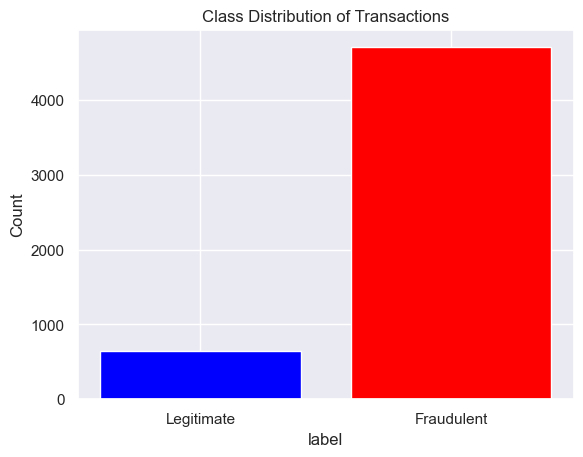

In [24]:

classes = ['Legitimate', 'Fraudulent']
counts = [legitimate_count, fraudulent_count]

# Create a bar chart
plt.bar(classes, counts, color=['blue', 'red'])
plt.xlabel('label')
plt.ylabel('Count')
plt.title('Class Distribution of Transactions')
plt.show()

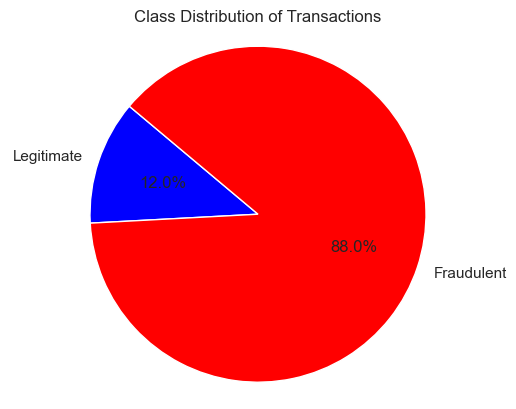

In [25]:
# Create a pie chart
plt.pie(counts, labels=classes, colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Class Distribution of Transactions')
plt.show()



# Visualization


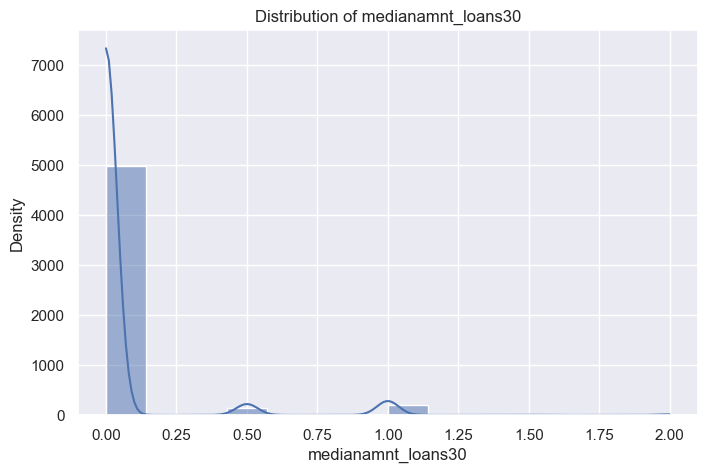

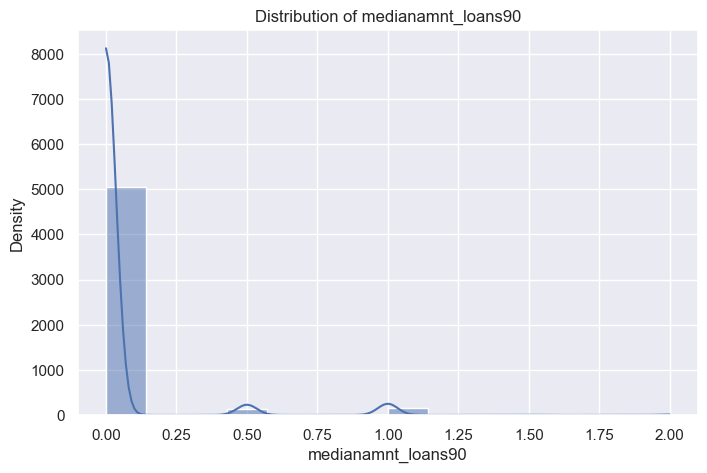

In [26]:
# Assuming 'data' is your DataFrame
num_features = [ 'medianamnt_loans30', 'medianamnt_loans90']  # Replace with your actual feature names

# Create histograms or density plots
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(bank_fraud_data[feature], kde=True)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Distribution of {feature}')
    plt.show()

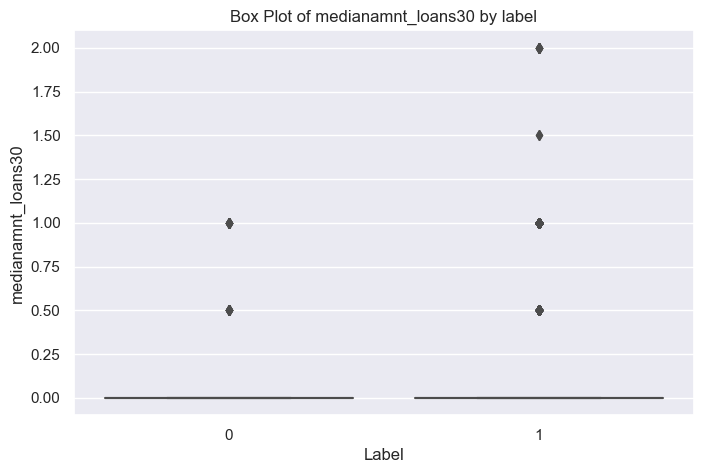

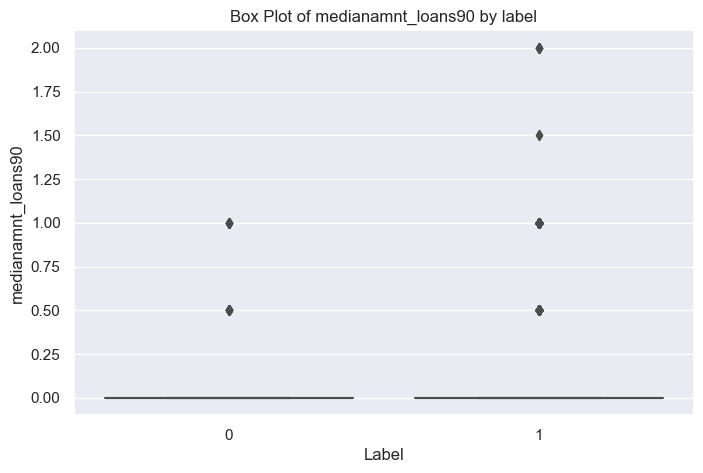

In [27]:
# Create box plots
for feature in num_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=bank_fraud_data['label'], y=bank_fraud_data[feature])
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by label')
    plt.show()

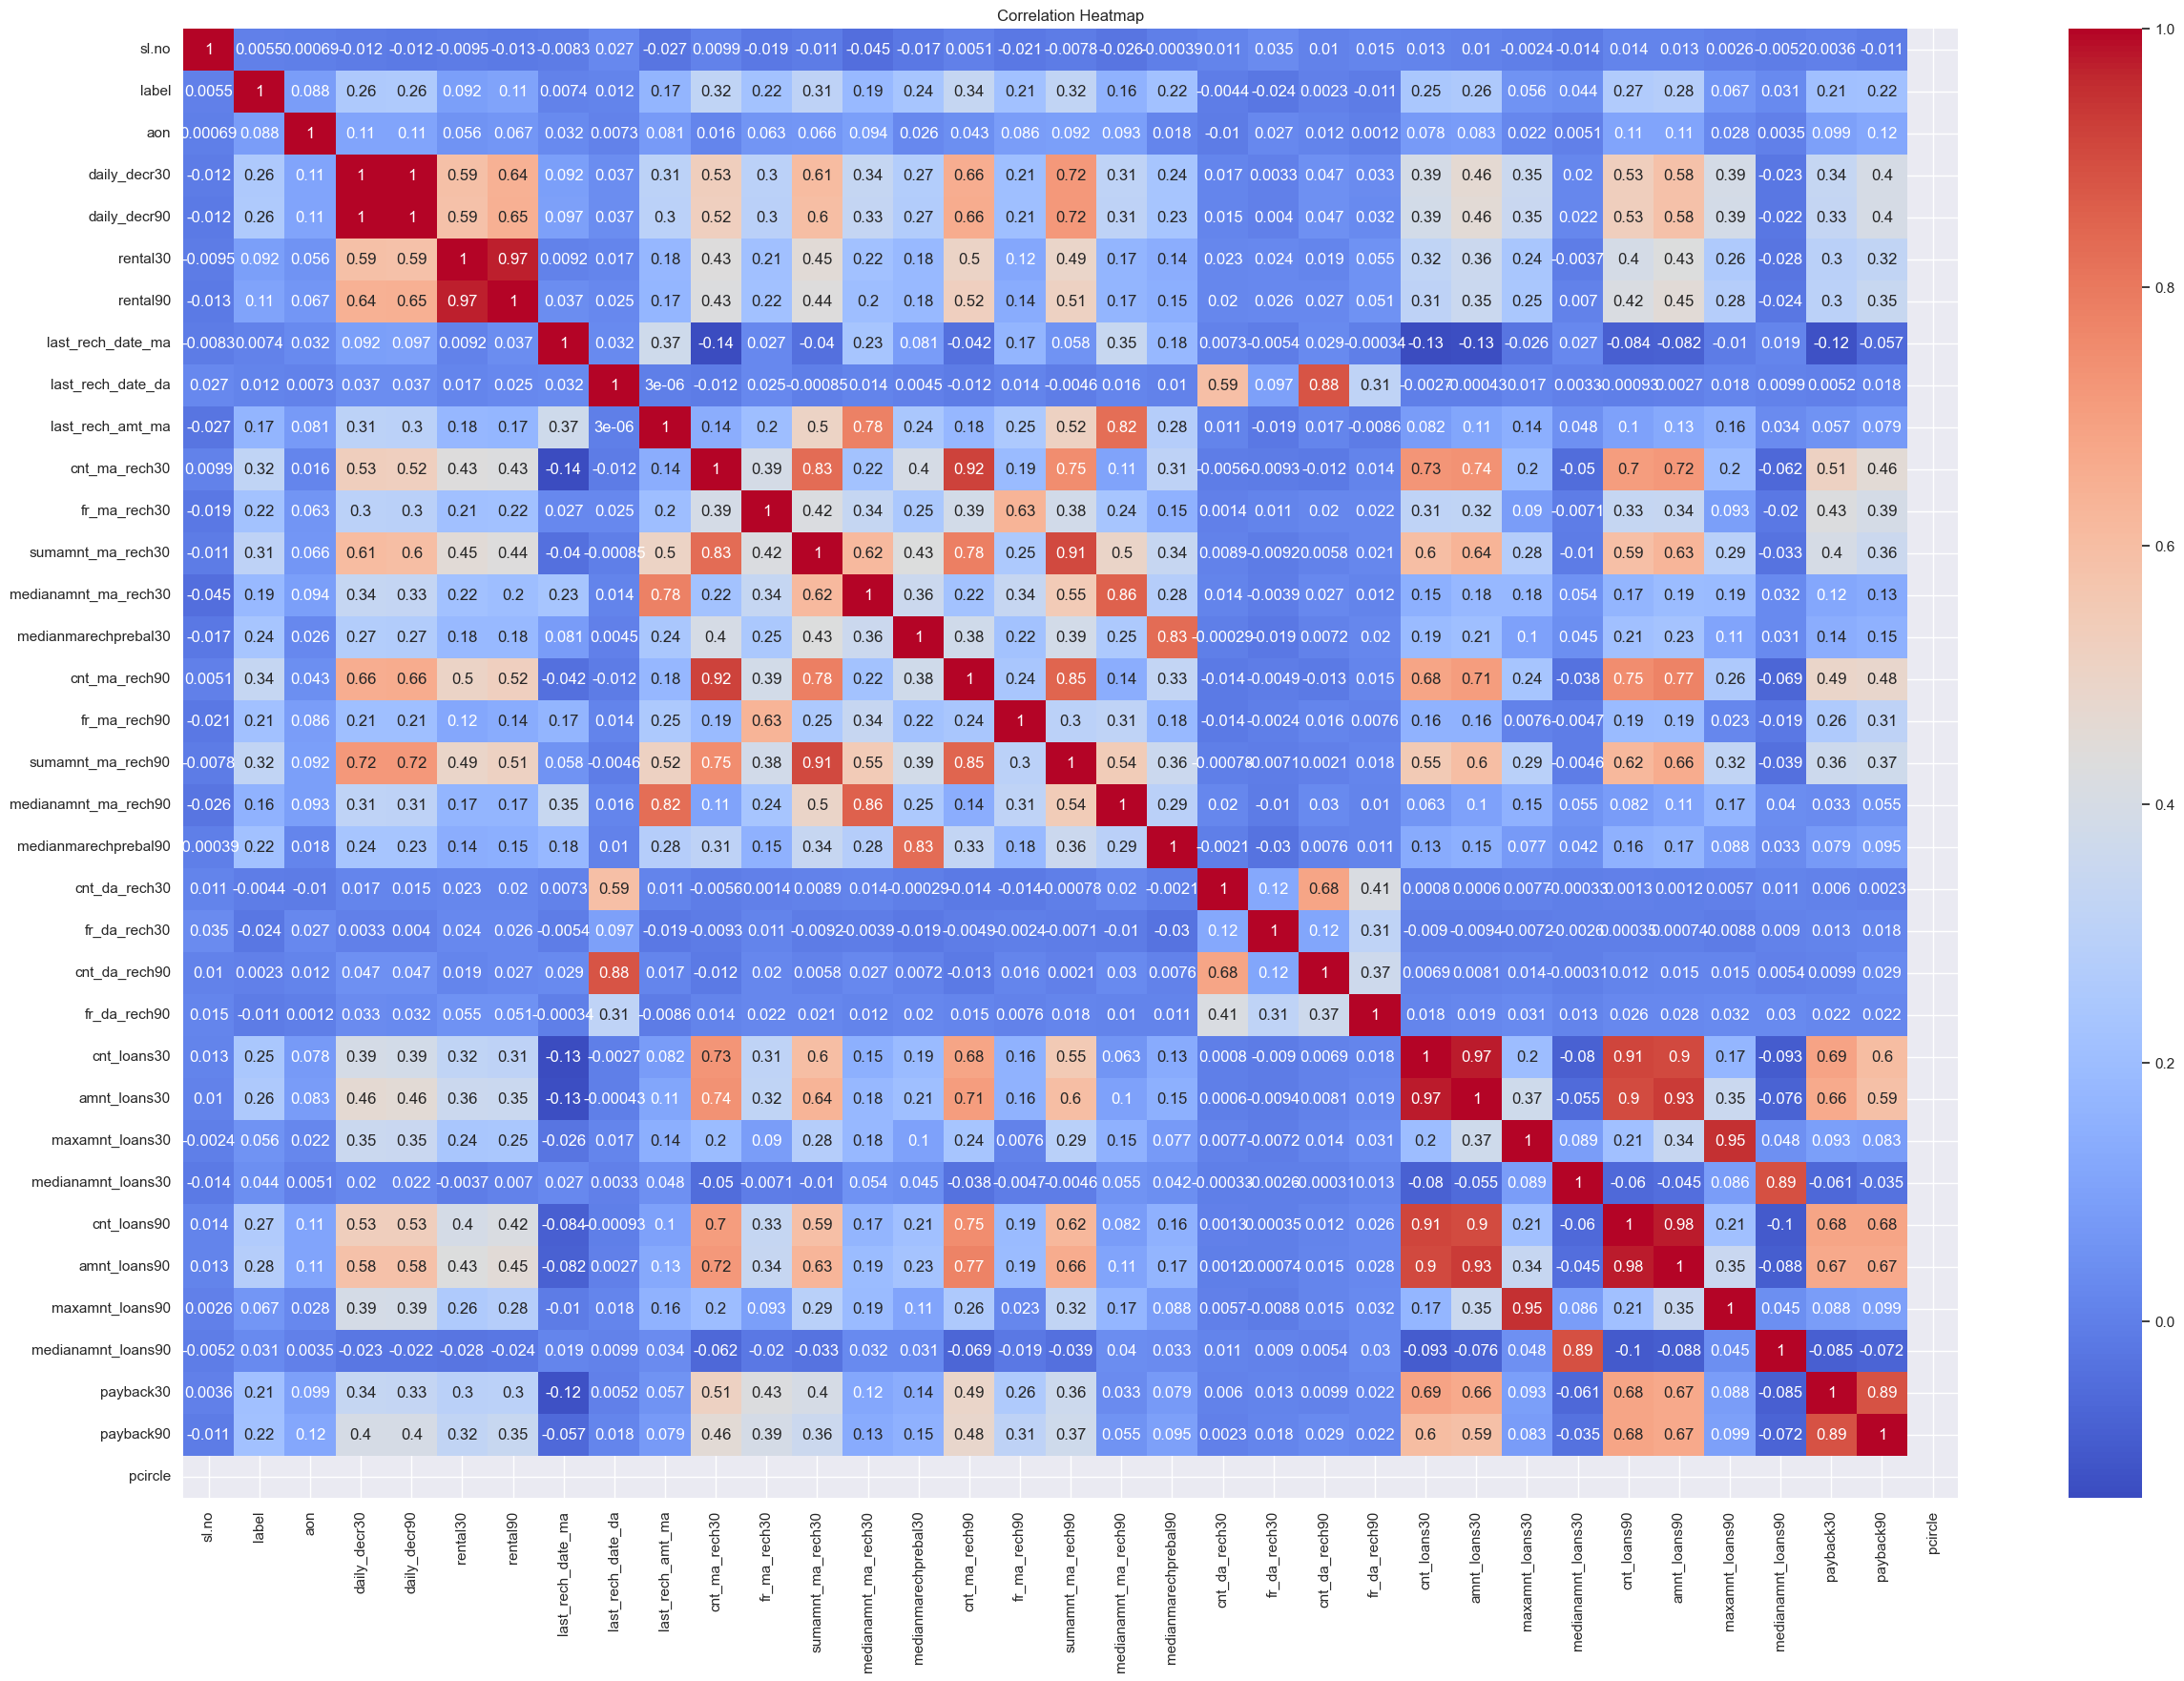

In [28]:
# Calculate correlations
correlation_matrix = bank_fraud_data.corr(method='spearman')  # or 'spearman'

# Create a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

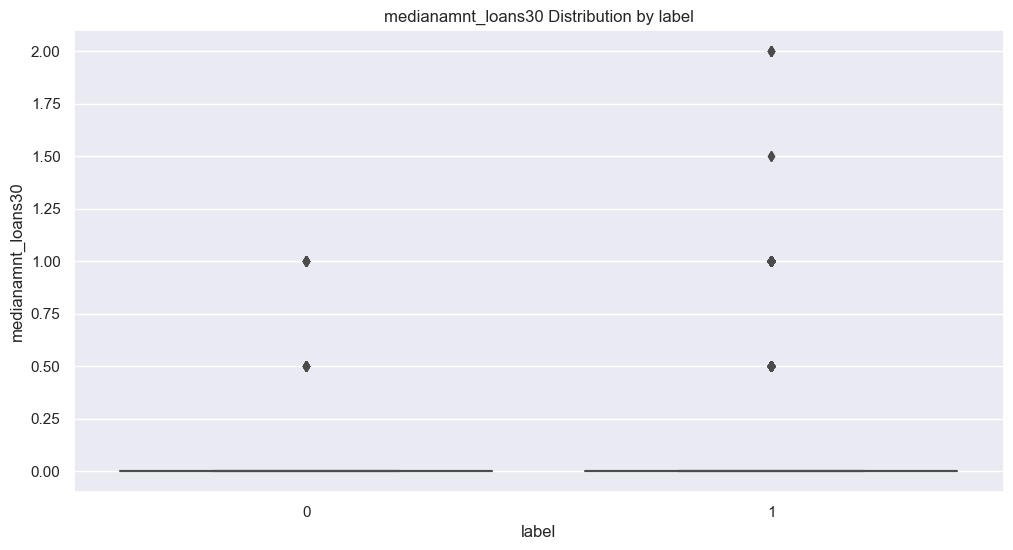

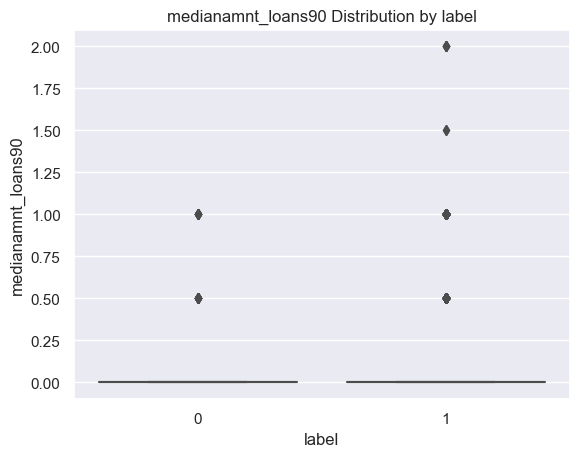

In [29]:
# Select features for comparison
features_of_interest = [ 'medianamnt_loans30', 'medianamnt_loans90']

# Create side-by-side box plots
plt.figure(figsize=(12, 6))
for feature in features_of_interest:
    sns.boxplot(x='label', y=feature, data=bank_fraud_data)
    plt.title(f'{feature} Distribution by label')
    plt.show()


# time series analysis

In [30]:
# Convert the timestamp column to datetime format
bank_fraud_data['pdate'] = pd.to_datetime(bank_fraud_data['pdate'])

# Set the timestamp column as the index
bank_fraud_data.set_index('pdate', inplace=True)

In [31]:

# Resample the data to daily frequency and aggregate using sum
daily_data = bank_fraud_data.resample('D').sum()

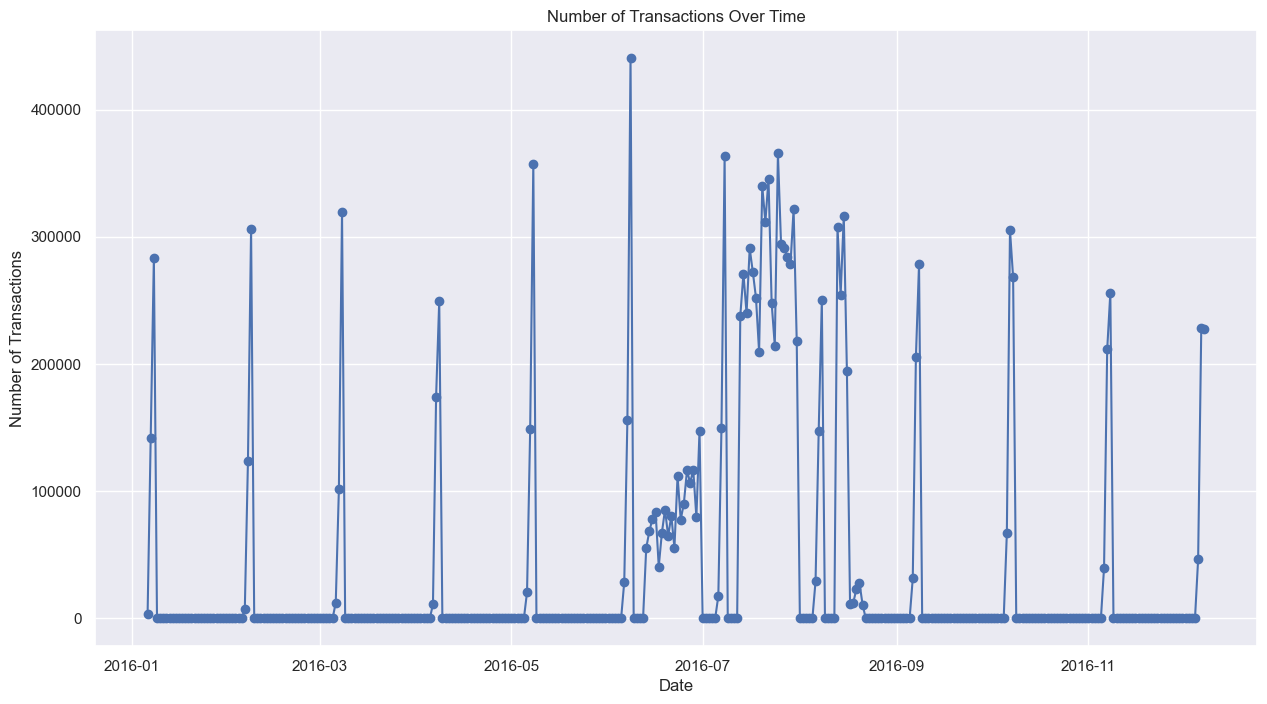

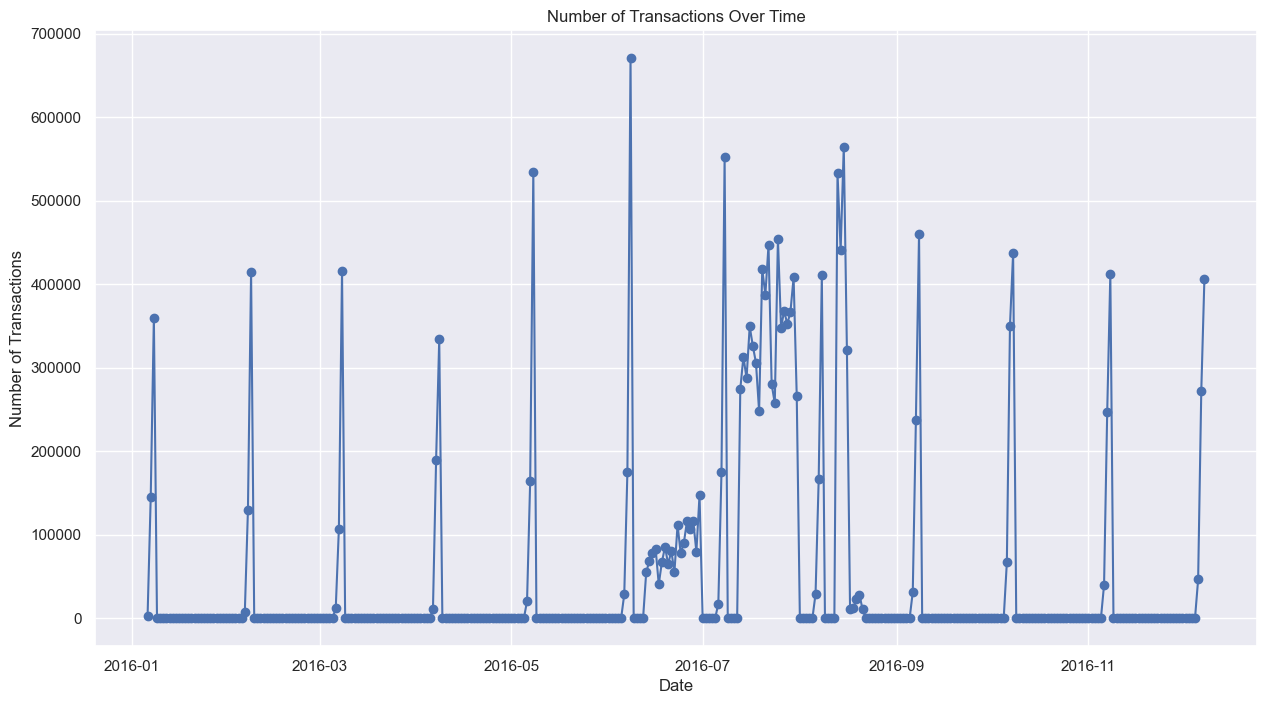

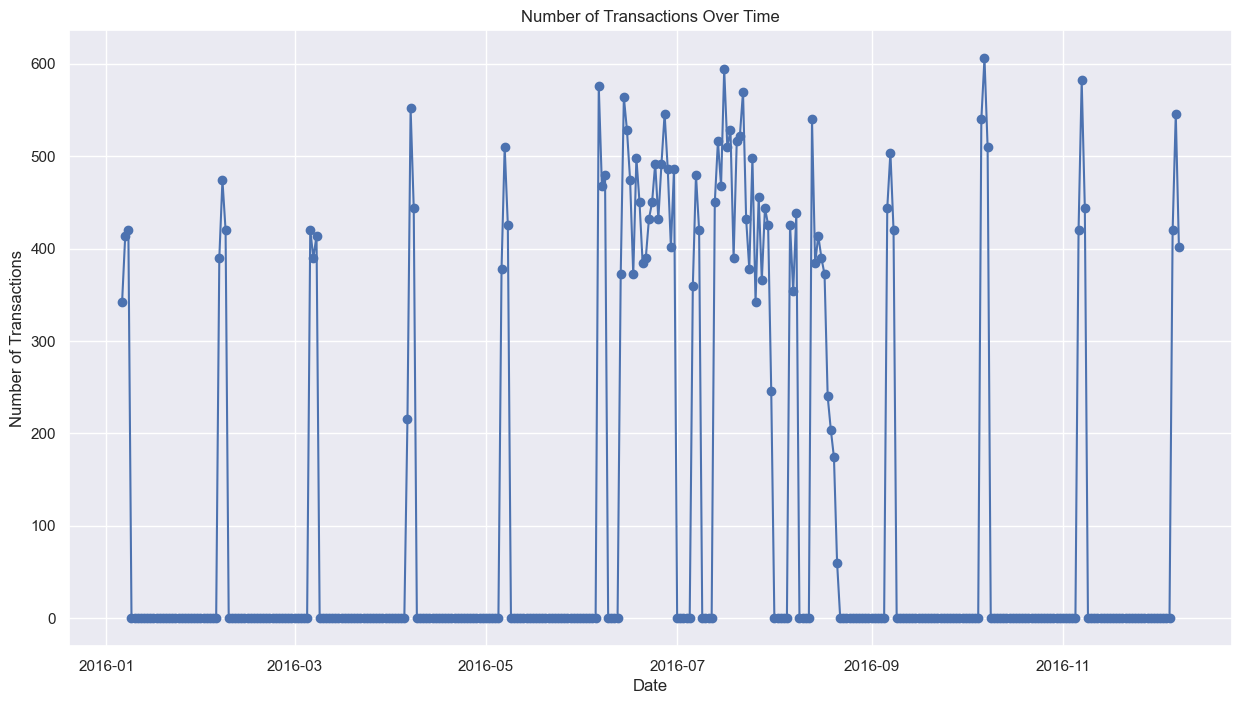

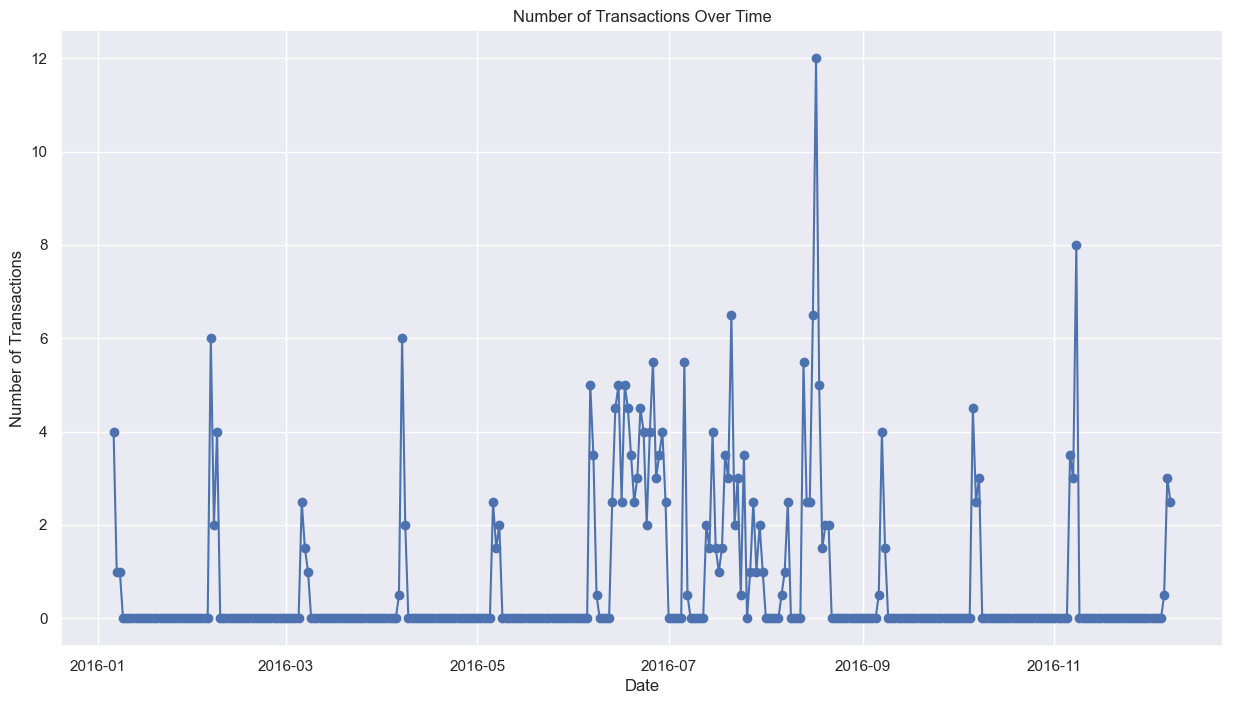

In [32]:


transactions=['rental30','rental90','maxamnt_loans90','medianamnt_loans90']
for feature in transactions:
    plt.figure(figsize=(15, 8))
    plt.plot(daily_data.index, daily_data[feature], marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Number of Transactions')
    plt.title('Number of Transactions Over Time')
    plt.grid(True)
    plt.show()

<Axes: >

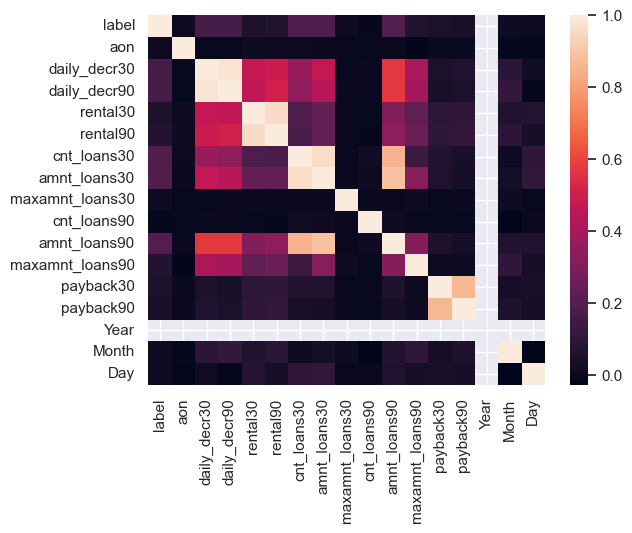

In [33]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(data.corr())


# Model Selection

In [34]:
columns_to_drop=['label','msisdn']
X = data.drop(columns=columns_to_drop)
y = data["label"]
Z = data["msisdn"]

In [35]:
Z= pd.to_numeric(Z, errors='ignore') 

In [36]:
X

,aon,daily_decr30,daily_decr90,rental30,rental90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,Year,Month,Day
0,272.0,3055.050000,3065.150000,220.13,260.13,2,12,6.0,2.0,12,6,29.000000,29.000000,2016,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,1,12,12.0,1.0,12,12,0.000000,0.000000,2016,10,8
2,535.0,1398.000000,1398.000000,900.13,900.13,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,8,19
3,241.0,21.228000,21.228000,159.42,159.42,2,12,6.0,2.0,12,6,0.000000,0.000000,2016,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,7,42,6.0,7.0,42,6,2.333333,2.333333,2016,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,315.0,9910.165000,9955.990000,682.50,1096.75,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,7,25
5339,1885.0,41.440000,41.440000,2042.60,2042.60,4,24,6.0,4.0,24,6,7.333333,7.333333,2016,6,28
5340,1924.0,1543.626667,1548.100000,916.26,960.26,1,6,6.0,2.0,12,6,0.000000,4.500000,2016,7,22
5341,145.0,40.200000,40.200000,162.00,162.00,1,6,6.0,1.0,6,6,0.000000,0.000000,2016,6,18


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.isnull().sum()

aon                0
daily_decr30       0
daily_decr90       0
rental30           0
rental90           0
cnt_loans30        0
amnt_loans30       0
maxamnt_loans30    0
cnt_loans90        0
amnt_loans90       0
maxamnt_loans90    0
payback30          0
payback90          0
Year               0
Month              0
Day                0
dtype: int64

In [39]:
X_train.to_csv('Dataset/all_features1.csv',index=False)

# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
D_tree = DecisionTreeClassifier(criterion="entropy")

In [42]:
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
y_pred = D_tree.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [45]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[ 56,  68],
       [ 82, 863]], dtype=int64)

In [46]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[ 56,  68],
       [ 82, 863]], dtype=int64)

In [47]:
recall_score(y_test, y_pred)

0.9132275132275133

In [48]:
precision_score(y_test, y_pred)

0.9269602577873255

In [49]:
f1_score(y_test, y_pred)

0.920042643923241

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfr = RandomForestClassifier(n_estimators = 50,criterion = "entropy")  
rfr.fit(X_train, y_train)  
pred = rfr.predict(X_train)

In [52]:
y_pred= rfr.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[ 41,  83],
       [ 22, 923]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.90177736202058

In [55]:
recall_score(y_test, y_pred)

0.9767195767195768

In [56]:
precision_score(y_test, y_pred)

0.9174950298210736

In [57]:
f1_score(y_test, y_pred)

0.9461814454126088

# Save Model


In [58]:
import pickle
# Saving model to disk of random forest
pickle.dump(rfr, open('model.pkl','wb'))

In [59]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[947.0,150.619333,150.619333,1098.90,1098.90,7,42,6.0,7.000000,42,6,2.333333,2.333333,2016,6,22]])

array([1], dtype=int64)